<a href="https://colab.research.google.com/github/raae7742/study-ml-basic/blob/main/7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 심층 신경망

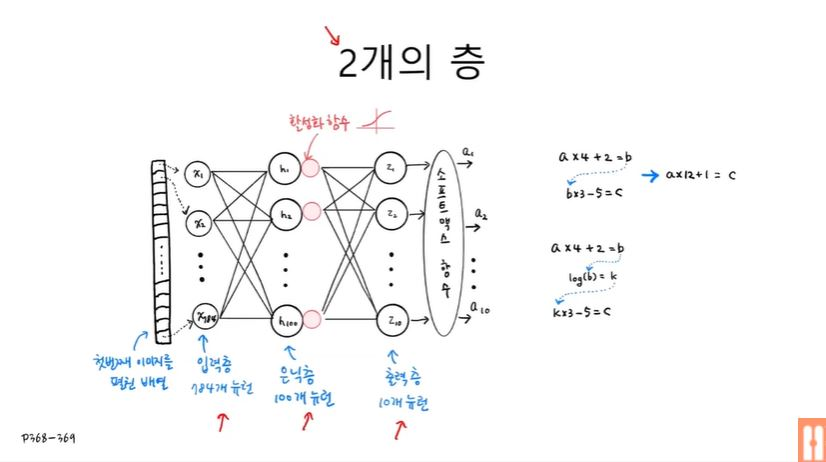

- 784개의 입력층: 입력 데이터
- 100개의 은닉층: 정해진 값이 없지만, 출력 층의 개수보다 커야 값이 손실되지 않음
- 10개의 출력층: 클래스

In [1]:
# 이전 강의와 동일하게 데이터셋 준비
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 2개의 층

In [2]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [4]:
# 은닉층(dense1)과 출력층(dense2) 준비하기
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

## 심층 신경망 만들기

In [5]:
# 은닉층과 출력층을 넣어 모델 생성
model = keras.Sequential([dense1, dense2])

In [6]:
# 모델 각 레이어에 대한 설명 출력
# dense의 param = 784 * 100 + 100(절편) = 78500개
# dnse_1의 param = 100 * 10 + 10(절편) = 1010개
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## 층을 추가하는 다른 방법

In [7]:
# dense 클래스를 따로 만들지 않고 모델의 파라미터로 바로 사용하는 방법!
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

In [9]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 층을 추가하고 싶을 때 가장 많이 사용하는 방법
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5628 - accuracy: 0.8073
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4075 - accuracy: 0.8522
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3741 - accuracy: 0.8652
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3509 - accuracy: 0.8732
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3335 - accuracy: 0.8784


## 렐루 활성화 함수

In [15]:
# relu(2): 0보다 작으면 0을 출력, 0보다 크면 z값을 출력 = max(0,2)
# activation='relu'로 렐루 함수 사용 가능
model = keras.Sequential()
# Flatten: 28*28 이미지 크기를 784 크기의 1차원으로 펼치는 역할
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [17]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [18]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5336 - accuracy: 0.8090
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3934 - accuracy: 0.8579
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3554 - accuracy: 0.8717
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3342 - accuracy: 0.8801
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3177 - accuracy: 0.8866


In [19]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3757 - accuracy: 0.8731


[0.3757036030292511, 0.8730833530426025]

## 옵티마이저

In [21]:
# sgd: 확률적 경사
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [22]:
# 객체를 만들어서 넣어도 위와 똑같은 일을 수행함
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [23]:
# 학습률 설정
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [25]:
# 모멘텀이나 nesterov를 사용하고 싶은 경우에 설정
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [31]:
# Adam 옵티마이저 사용법
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5240 - accuracy: 0.8167
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3921 - accuracy: 0.8608
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3543 - accuracy: 0.8710
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3287 - accuracy: 0.8809
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3074 - accuracy: 0.8860


In [32]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3526 - accuracy: 0.8716


[0.3525942862033844, 0.8715833425521851]